In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Load the dataset
df = pd.read_csv("titanic.csv")

# Display the first few rows to understand the data structure
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [7]:
# Step 1: Data Cleaning
# 1. Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Handle missing values without using inplace=True to avoid the warning
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
# 3. Check data types
print("\nData types:\n", df.dtypes)

# 4. Remove duplicates if any
df.drop_duplicates(inplace=True)


Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


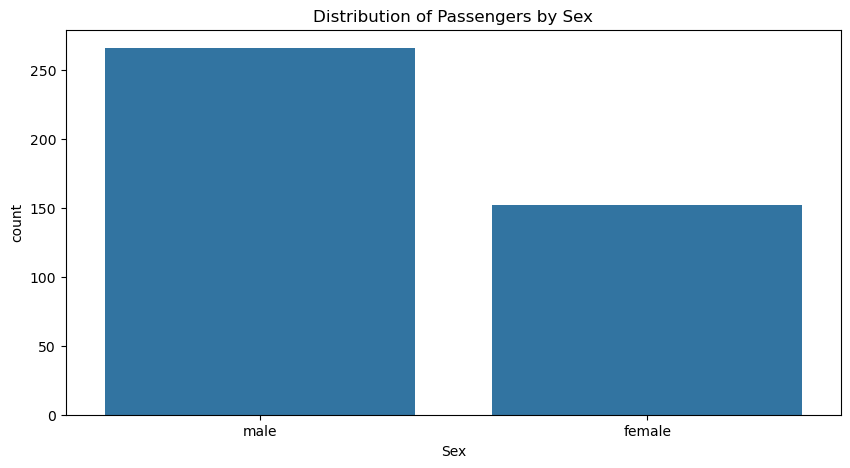

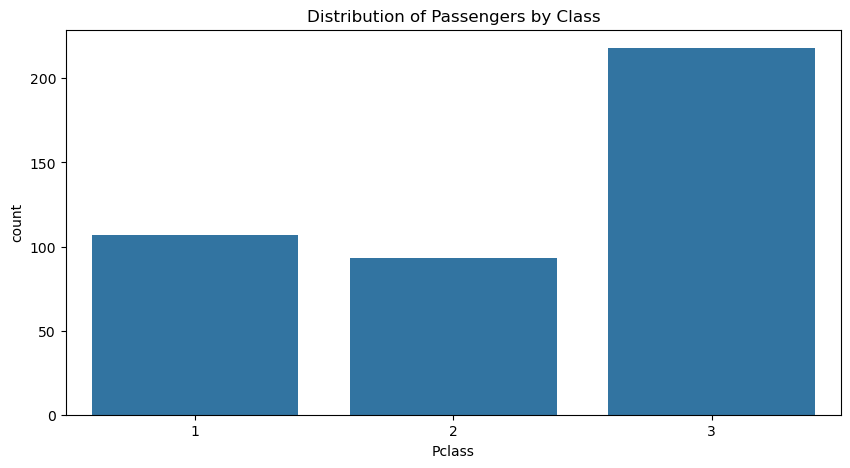

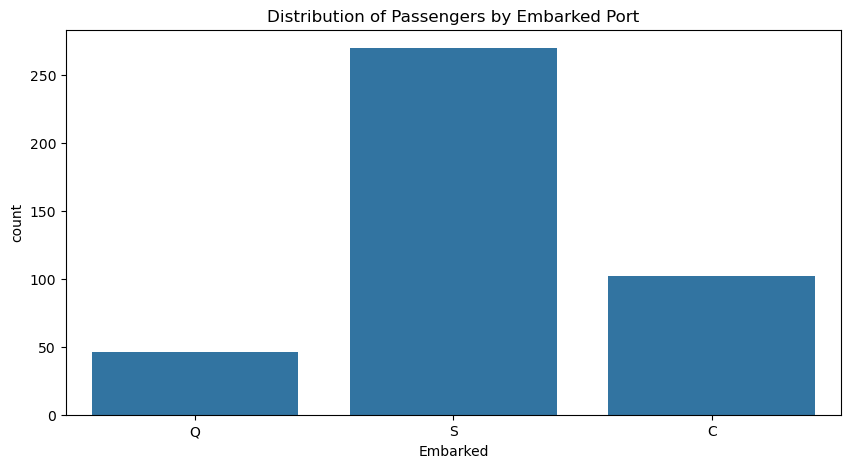

In [11]:
# Step 2: Exploratory Data Analysis (EDA)

# Univariate Analysis
# 1. Distribution of categorical variables (e.g., Sex, Pclass, Embarked)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Sex')
plt.title("Distribution of Passengers by Sex")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Pclass')
plt.title("Distribution of Passengers by Class")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Embarked')
plt.title("Distribution of Passengers by Embarked Port")
plt.show()

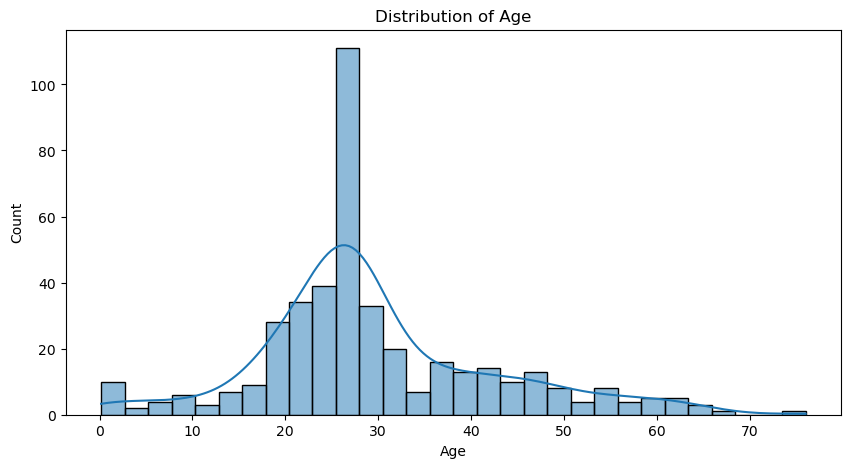

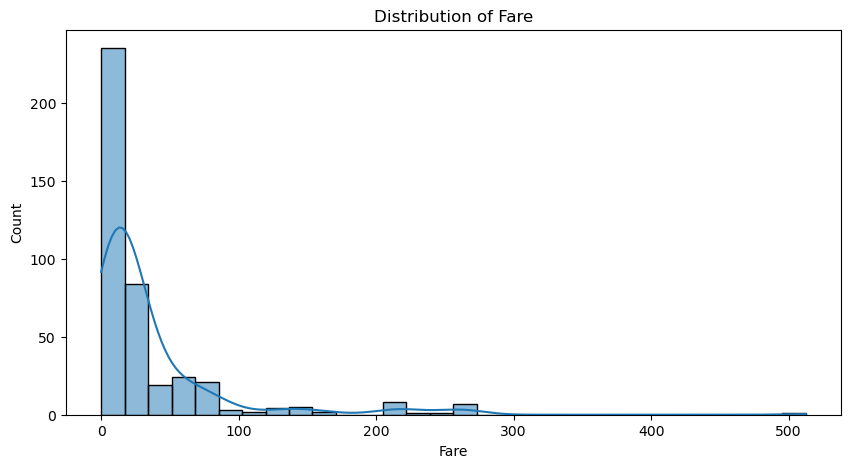

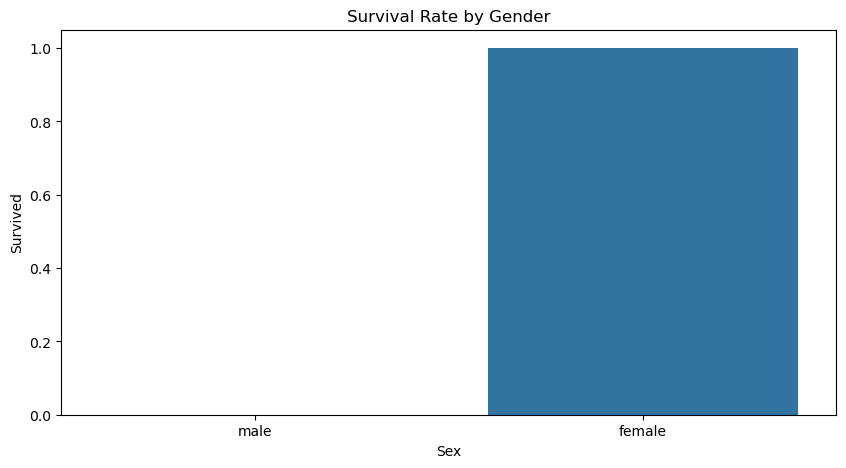

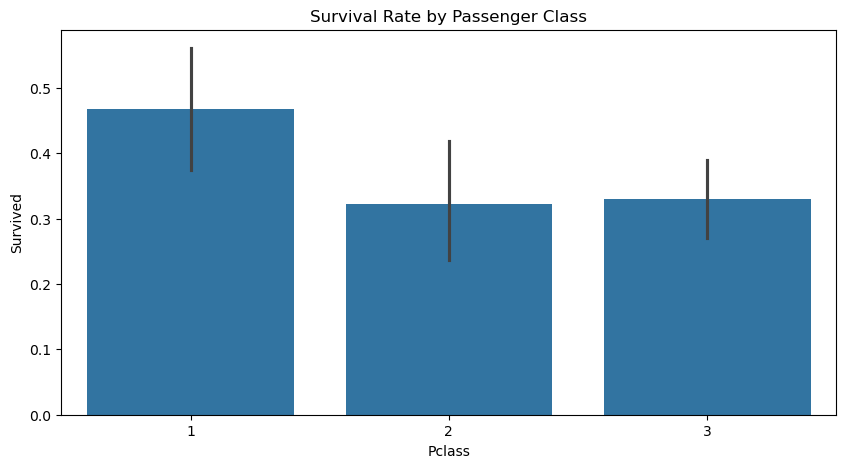

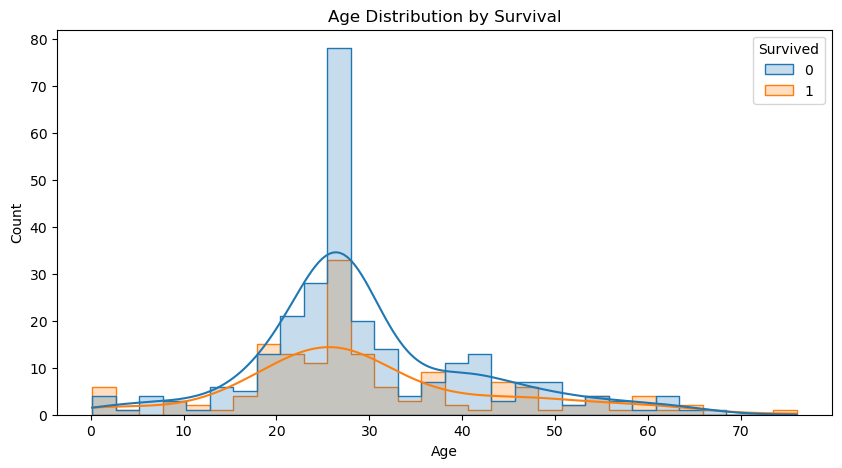

In [13]:
# 2. Distribution of numerical variables (e.g., Age, Fare)
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Distribution of Fare")
plt.show()

# Bivariate Analysis
# 1. Survival Rate by Gender
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Sex', y='Survived')
plt.title("Survival Rate by Gender")
plt.show()

# 2. Survival Rate by Passenger Class
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title("Survival Rate by Passenger Class")
plt.show()

# 3. Age Distribution for Survived and Not Survived
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, element="step")
plt.title("Age Distribution by Survival")
plt.show()

<Figure size 1000x500 with 0 Axes>

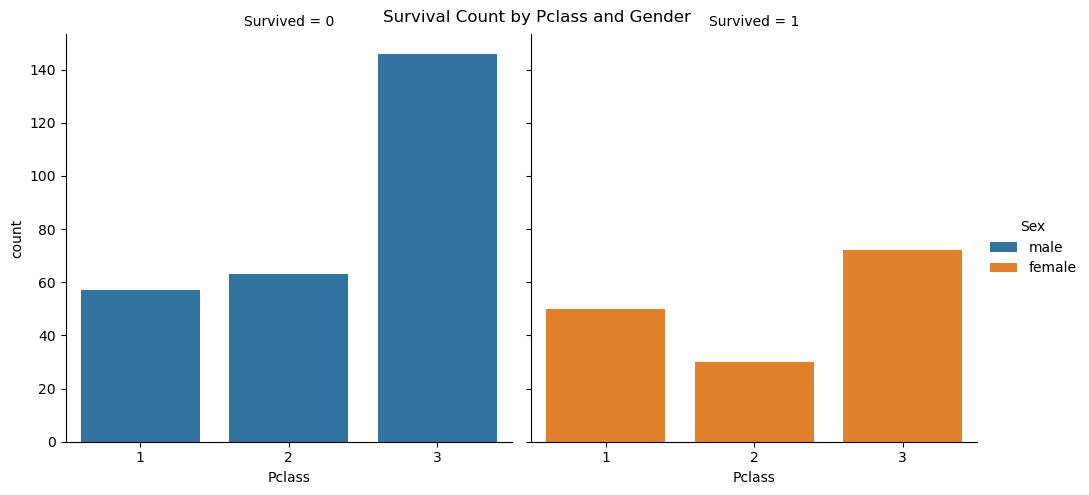

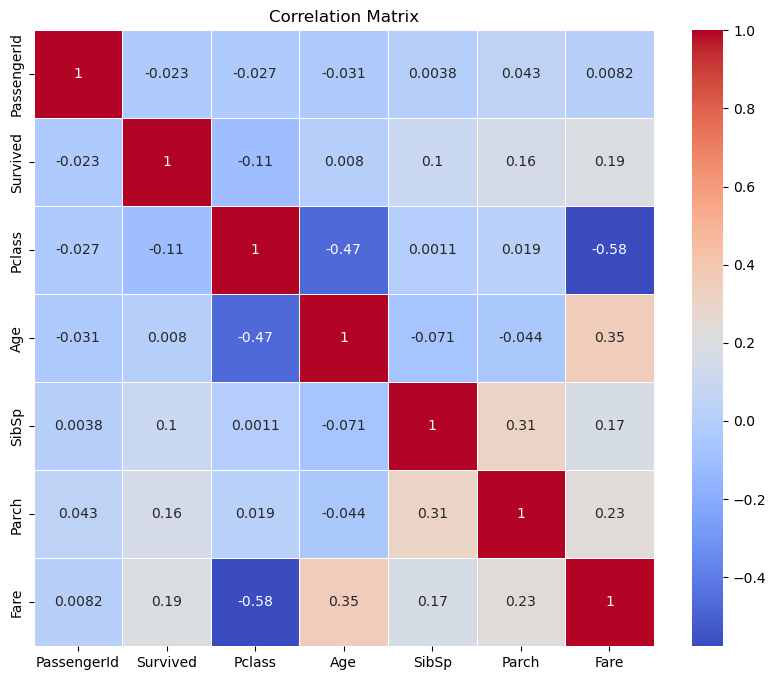

In [15]:
# Multivariate Analysis
# 1. Survival rate by Pclass and Gender
plt.figure(figsize=(10, 5))
sns.catplot(data=df, x='Pclass', hue='Sex', col='Survived', kind='count')
plt.suptitle("Survival Count by Pclass and Gender")
plt.show()

# Step 3: Identifying Patterns and Trends
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Generate the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [17]:
# Summary
# Describe key findings
print("\nKey Findings:")
print("1. Overall survival rate analysis with respect to various features.")
print("2. Survival rates are higher among females and higher classes.")
print("3. Other trends, etc.")


Key Findings:
1. Overall survival rate analysis with respect to various features.
2. Survival rates are higher among females and higher classes.
3. Other trends, etc.
